### YOLO v8 train & inference

We use the YOLO V8 model for this competition because it can execute the object detection and segmentation at the same time.  
Because of this notebook is online, we can't submit this directly.  

In [1]:
import shutil
import os
import pandas as pd
import numpy as np
import tifffile as tiff
import matplotlib.pyplot as plt

from pathlib import Path
from glob import glob
from collections import defaultdict
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from IPython.display import Image as show_image

import ultralytics
from ultralytics import YOLO

import torch

ultralytics.checks()

Ultralytics YOLOv8.0.131 🚀 Python-3.9.16 torch-2.0.1 CUDA:0 (NVIDIA GeForce RTX 4090, 24217MiB)
Setup complete ✅ (24 CPUs, 31.1 GB RAM, 1726.2/1832.2 GB disk)


## Set parameters

### Hyper parameters

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

IMAGE_SIZE = 256
BATCH_SIZE = 8
EPOCHS = 50


print(device)

cuda


## YOLO

In [3]:
# Edit yaml content
yaml_content = f'''
train: /home/viktor/Documents/kaggle/hubmap-2023/experiments/yolo/yolov8-vanilla/YOLOv8x-maskrcnn-augms/datasets/train/images
val: /home/viktor/Documents/kaggle/hubmap-2023/experiments/yolo/yolov8-vanilla/YOLOv8x-maskrcnn-augms/datasets/val/images

names:
    0: blood_vessel
'''

yaml_file = 'data.yaml'

with open(yaml_file, 'w') as f:
    f.write(yaml_content)

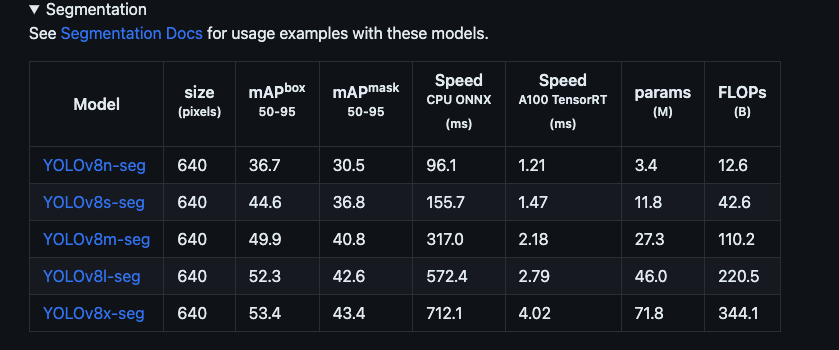

In [4]:
# prepare model
# model = YOLO('yolov8n-seg.pt')
model = YOLO('yolov8x-seg.pt')

In [5]:
x = torch.randn((1, 3, IMAGE_SIZE, IMAGE_SIZE))
pred = model.predict(x)



WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 4.797696590423584. Dividing input by 255.
0: 1024x1024 (no detections), 63.5ms
Speed: 1.0ms preprocess, 63.5ms inference, 0.2ms postprocess per image at shape (1, 3, 1024, 1024)


In [6]:
# training
results = model.train(
    batch=BATCH_SIZE,
    device=0,
    data=yaml_file,
    epochs=EPOCHS,
    imgsz=IMAGE_SIZE,
    mixup=0.2,
    flipud=0.2,
    shear=0.4,
    degrees=45,
    copy_paste=0.2,
    dropout=0.2,
    iou=0.6,
    lr0=0.0001,
    lrf=0.01,
    optimizer='Adam',
    max_det=100
)

New https://pypi.org/project/ultralytics/8.0.145 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.131 🚀 Python-3.9.16 torch-2.0.1 CUDA:0 (NVIDIA GeForce RTX 4090, 24217MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8x-seg.pt, data=data.yaml, epochs=450, patience=50, batch=8, imgsz=1024, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.2, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.6, max_det=100, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, ret

KeyboardInterrupt: 

In [ ]:
image = tiff.imread('runs/segment/predict/72e40acccadf.tif')
plt.imshow(image)

In [ ]:
# how many files in folder /home/viktor/Documents/kaggle/hubmap-2023/experiments/yolo/yolov8-vanilla/YOLOv8x-maskrcnn-augms/datasets/train/images
folder = '/home/viktor/Documents/kaggle/hubmap-2023/experiments/yolo/yolov8-vanilla/YOLOv8x-maskrcnn-augms/datasets/train/images'
len(os.listdir(folder))